# Developing Brain Atlas through Deep Learning 

## A. Iqbal, R. Khan, T. Karayannis
# .
# .
# .

# Creating custom (your own) training and testing dataset for SeBRe

## Import libraries

In [1]:
import os
import glob #for selecting png files in training images folder
from natsort import natsorted, ns #for sorting filenames in a directory
import skimage
from skimage import io
import numpy as np

# Root directory of the project
ROOT_DIR = os.getcwd()

## Save training and validation images
1. Save training images in the folder 'myDATASET/mrcnn_train_dataset_images', with the naming convention 'section_img_0.png, section_img_1.png, section_img_2.png,...'.
2. Save validation images in the folder 'myDATASET/mrcnn_val_dataset_images' , with the naming convention 'section_img_0.png, section_img_1.png, section_img_2.png,...'.

## Load binary masks in SeBRe-readable-format
1. Use an SVG editor (eg. BoxySVG, RectLabel, InkScape etc.) to create masks on top of each brain region of interest (eg. cortex, hippocampus, cerebellum etc.), giving the mask for each distinct region a unique RGB color code (eg. cortex[242,25,60], hippocampus[255,72,151],cerebellum[238,93,255]).
2. Reduce the opacity of underlying brain tissue image to zero.
3. Export masked brain image into PNG file format; save each masked brain image file into a separate subfolder ('masked_section_0','masked_section_1', etc.), inside the folder 'myDATASET/training_images_masked' or 'myDATASET/validation_images_masked'.

### Create regionwise binary masks

In [107]:
os.chdir(ROOT_DIR)

In [ ]:
plt.imshow()

c:\users\argunsah-adm\appdata\local\programs\python\python35\lib\site-packages\PIL\Image.py:2575: DecompressionBombWarning: Image size (137023488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
c:\users\argunsah-adm\appdata\local\programs\python\python35\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\argunsah-adm\appdata\local\programs\python\python35\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
c:\users\argunsah-adm\appdata\local\programs\python\python35\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from 

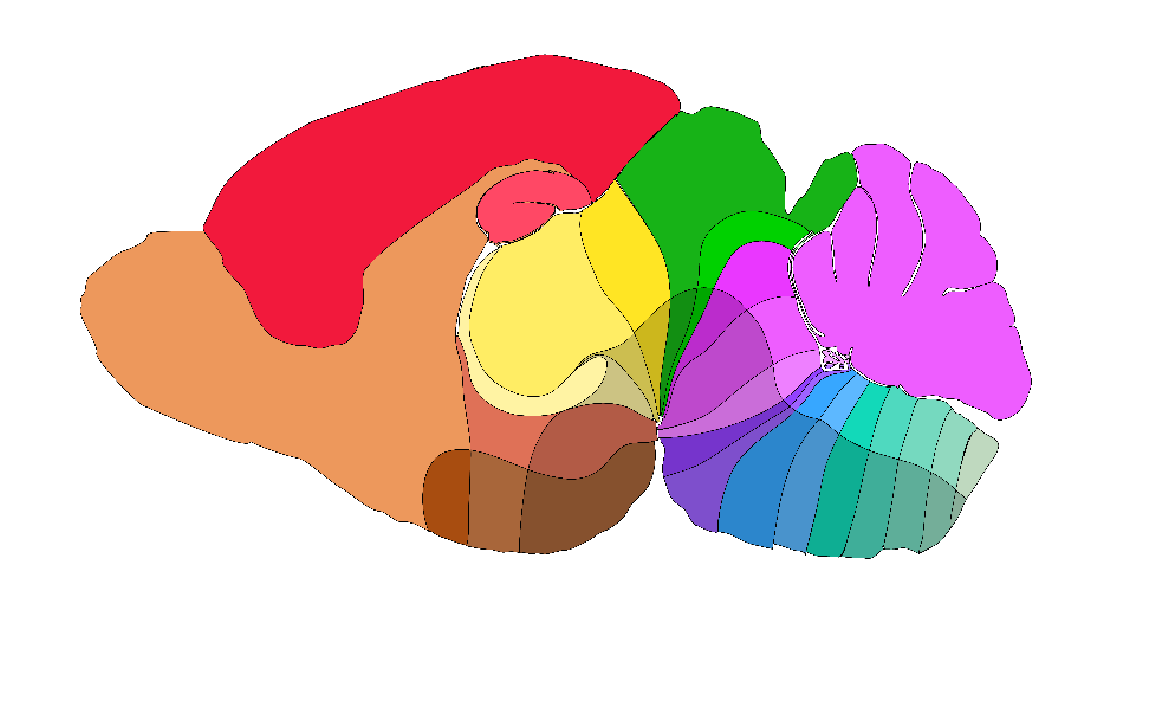

In [111]:
os.chdir(os.path.join(ROOT_DIR,'myDATASET\\training_images_masked')) # FOR CREATING TEST DATASET: os.path.join(ROOT_DIR,'myDATASET\\validation_images_masked')
all_masked_sections = natsorted(glob.glob('*'))
for section_num,section_fold in enumerate(all_masked_sections):   
    os.chdir(section_fold)
    masked_image_orig = skimage.io.imread(glob.glob('*')[0])
    [s1, s2, s3] = np.shape(masked_image_orig)
    masked_image = skimage.transform.resize(masked_image_orig,(s1/16,s2/16,s3))
    plt.figure(figsize=[20,20])
    plt.imshow(masked_image)
    plt.axis('off')
    plt.title('masked_section_0.png')
    [size1, size2, size3] = np.shape(masked_image)
    
    ### Create empty mask for each region:
    cortex_mask = np.zeros([size1,size2])
    hippocampus_mask = np.zeros([size1,size2])
    cerebellum_mask = np.zeros([size1,size2])
    
    ### Extract all regionwise masks (eg. cortex, hippocampus, cerebellum, etc.)   
    for index,x in np.ndenumerate(masked_image[:,:,0]):
        
        
        ### cortex
        if int(masked_image[index[0],index[1],0]*255) == 242 and int(masked_image[index[0],index[1],1]*255) == 25 and int(masked_image[index[0],index[1],2]*255) == 60:
            cortex_mask[index[0],index[1]] = 1
            
        ### hippocampus
        elif int(masked_image[index[0],index[1],0]*255) == 255 and int(masked_image[index[0],index[1],1]*255) == 72 and int(masked_image[index[0],index[1],2]*255) == 101:
            hippocampus_mask[index[0],index[1]] = 1
            
        ### cerebellum
        elif int(masked_image[index[0],index[1],0]*255) == 238 and int(masked_image[index[0],index[1],1]*255) == 93 and int(masked_image[index[0],index[1],2]*255) == 255:
            cerebellum_mask[index[0],index[1]] = 1 
    
    ### Save binary masks to training or validation folder (set image folder paths accordingly below):
    section_masks_dirname = ROOT_DIR+'\\myDATASET\\mrcnn_train_dataset_masks\\section_masks_'+str(section_num)
    if not os.path.exists(section_masks_dirname):    
        os.makedirs(section_masks_dirname)
        
    skimage.io.imsave(section_masks_dirname+'\\section_masks_'+str(section_num)+'_cortex_m1.png',cortex_mask)    
    skimage.io.imsave(section_masks_dirname+'\\section_masks_'+str(section_num)+'_hippocampus_m2.png',hippocampus_mask)    
    skimage.io.imsave(section_masks_dirname+'\\section_masks_'+str(section_num)+'_cerebellum_m3.png',cerebellum_mask)
    
    
    os.chdir('..')

In [114]:
os.chdir(ROOT_DIR+'\\myDATASET\\mrcnn_train_dataset_masks\\section_masks_0\\')

In [117]:
cortex = skimage.io.imread('section_masks_0_cortex_m1.png')
hippocampus = skimage.io.imread('section_masks_0_hippocampus_m2.png')
cerebullum = skimage.io.imread('section_masks_0_cerebellum_m3.png')

Text(0.5, 1.0, 'mask_cortex')

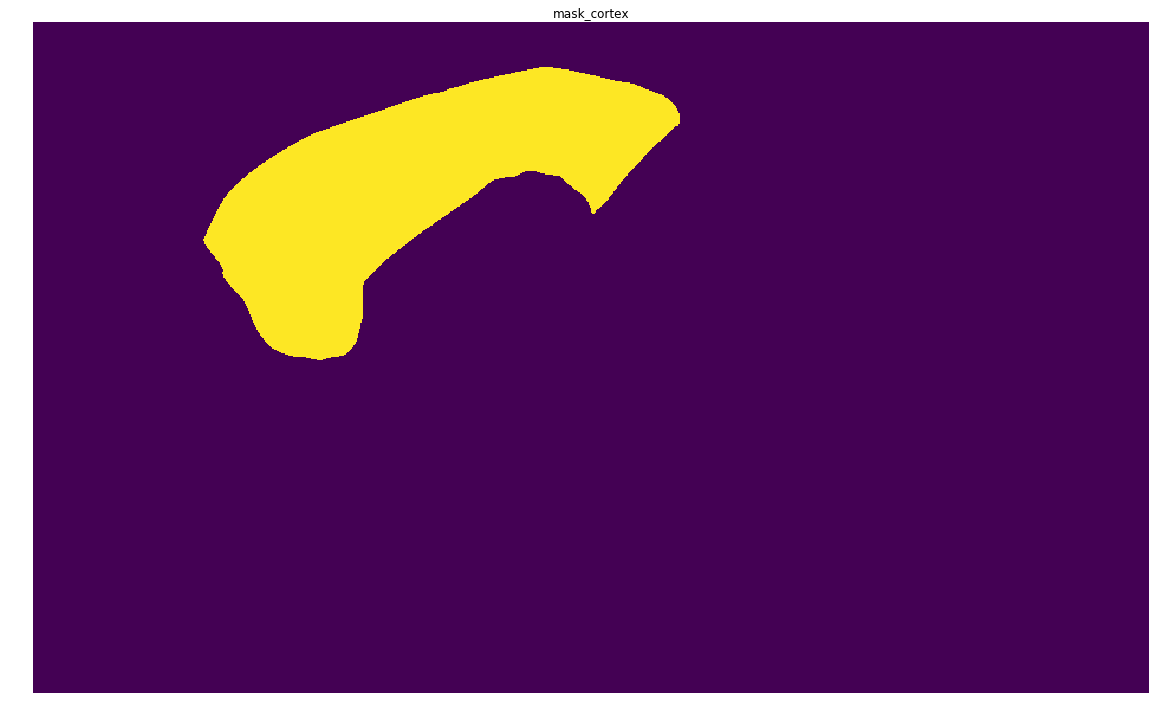

In [118]:
    plt.figure(figsize=[20,20])
    plt.imshow(cortex)
    plt.axis('off')
    plt.title('mask_cortex')

Text(0.5, 1.0, 'mask_hippocampus')

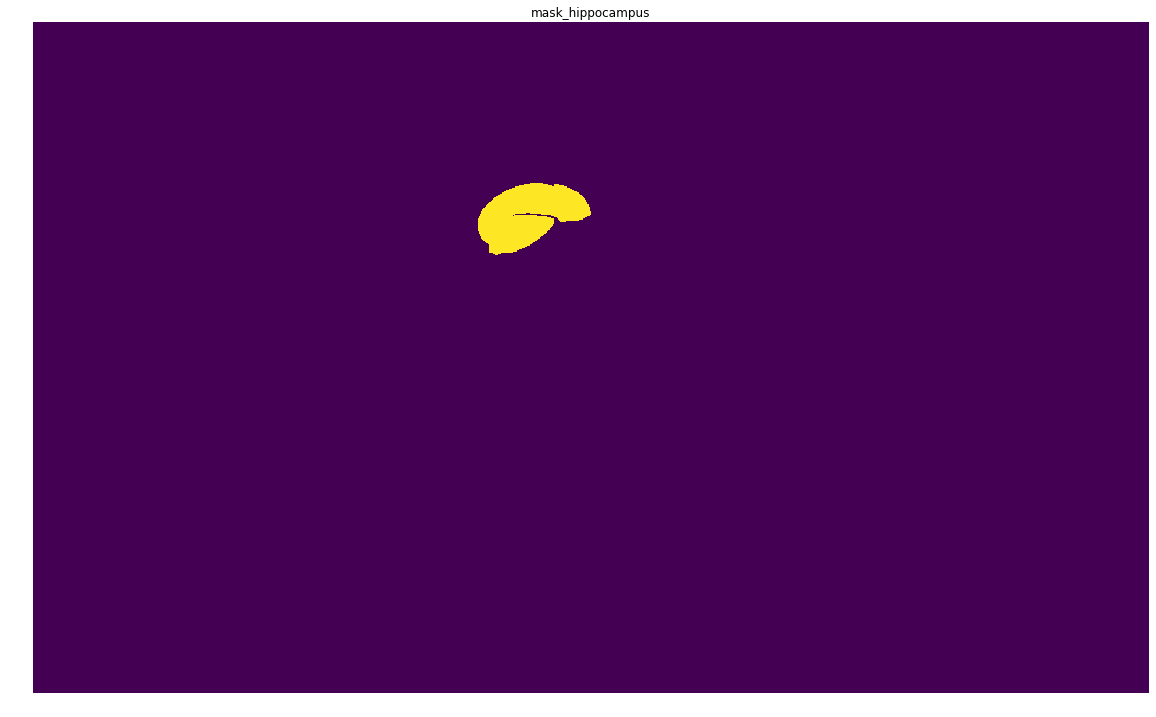

In [119]:
    plt.figure(figsize=[20,20])
    plt.imshow(hippocampus)
    plt.axis('off')
    plt.title('mask_hippocampus')

Text(0.5, 1.0, 'mask_cerebullum')

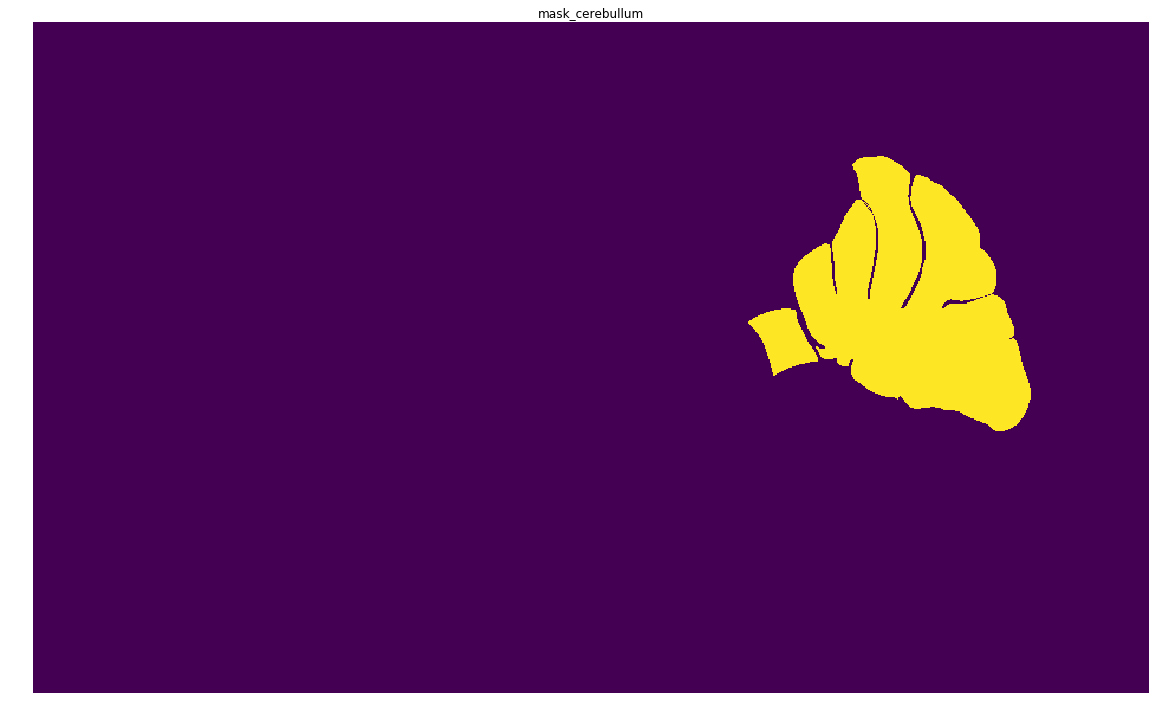

In [120]:
    plt.figure(figsize=[20,20])
    plt.imshow(cerebullum)
    plt.axis('off')
    plt.title('mask_cerebullum')